In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.impute import SimpleImputer


In [20]:
# Read the data
Housing_Data = pd.read_csv("/Users/krishna/Downloads/train.csv")
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# checking the shape of dataframe
Housing_Data.shape

(1460, 81)

In [22]:
# describing the columns of dataframe
Housing_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
# get the info about columns
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
# checking for the null values in column data
Housing_Data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [26]:
# Removing rows with null values in the 'LotFrontage' column
Housing_Data.dropna(subset=['LotFrontage'], inplace=True)

# Checking again for null values in the 'LotFrontage' column to verify if they've been removed
Housing_Data['LotFrontage'].isnull().sum()

0

In [27]:
# Again Checking for the null values in column data
Housing_Data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [28]:
# renaming few columns for better readibility
Housing_Data.rename (columns={'BldgType': 'Type of dwelling', 'MasVnrType': 'Masonry veneer type', 'MasVnrArea': 'Masonry veneer area in square feet'}, inplace=True)

In [29]:
# Check the head of the dataset
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# Copying the dataframe into new
Housing_Data_copy = Housing_Data.copy()

In [67]:
# checking the shape of new dataframe
Housing_Data_copy.shape

(1201, 81)

In [68]:
# dropping the duplicates
Housing_Data_copy.drop_duplicates(inplace=True)

In [69]:
# re-verifying the shape of new dataframe
Housing_Data_copy.shape

(1201, 81)

In [70]:
# dropping the unwanted columns
# instant has only index for the row, Redundant or Uninformative Features
Housing_Data_copy.drop( ['Condition2', 'BsmtFinType2'],axis=1, inplace=True)

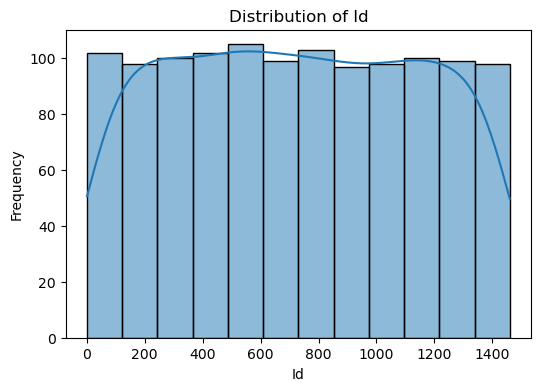

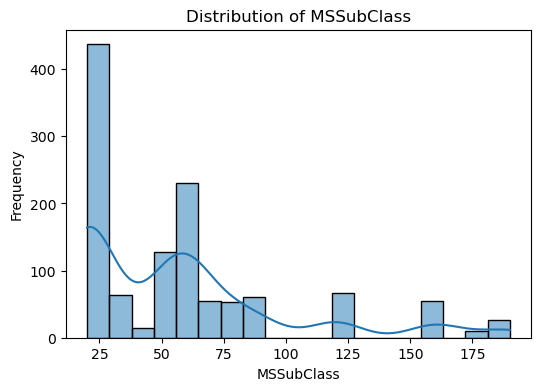

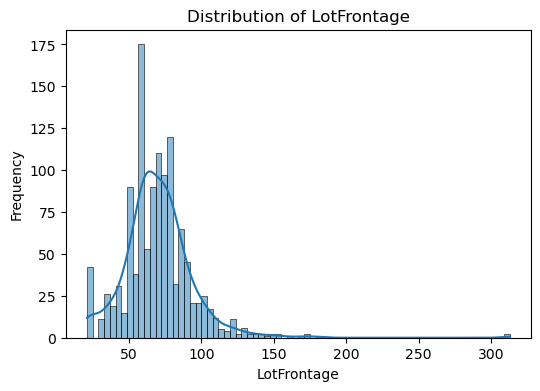

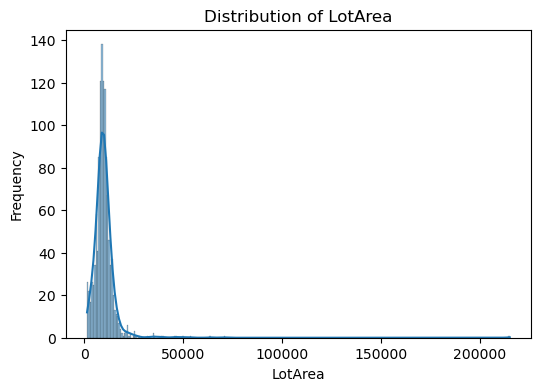

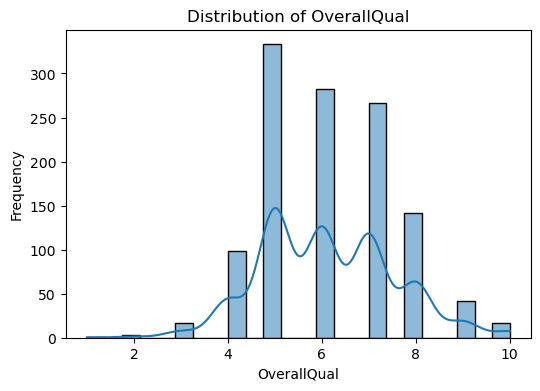

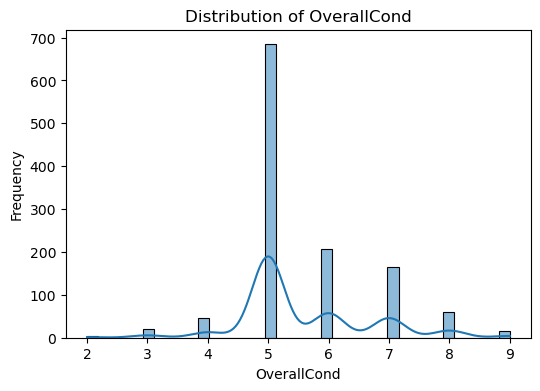

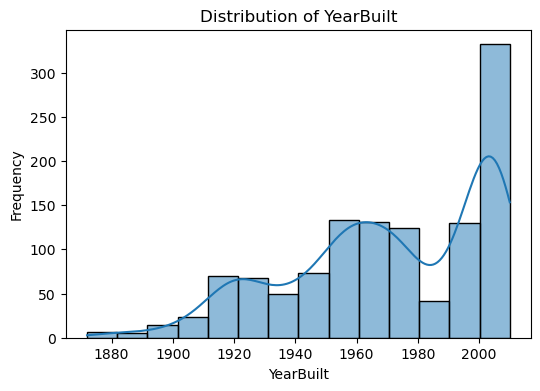

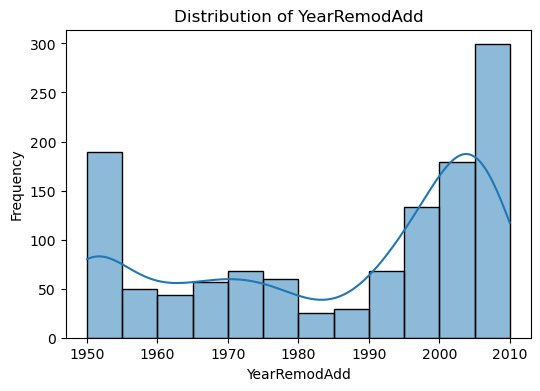

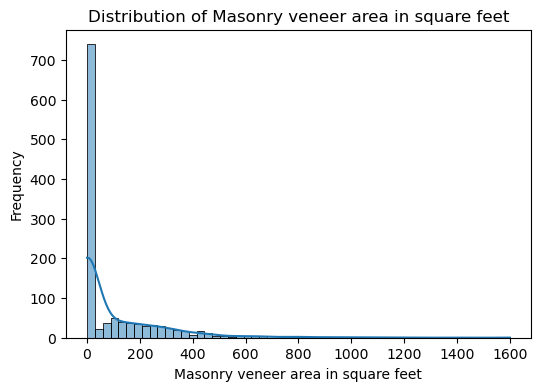

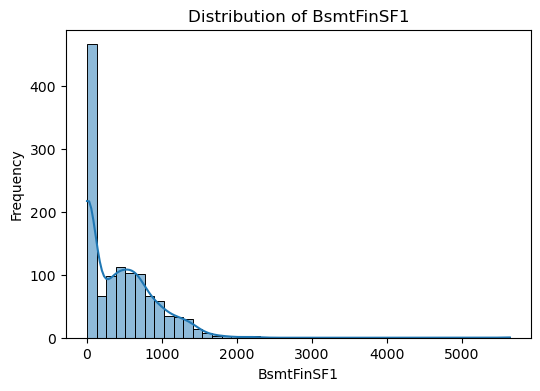

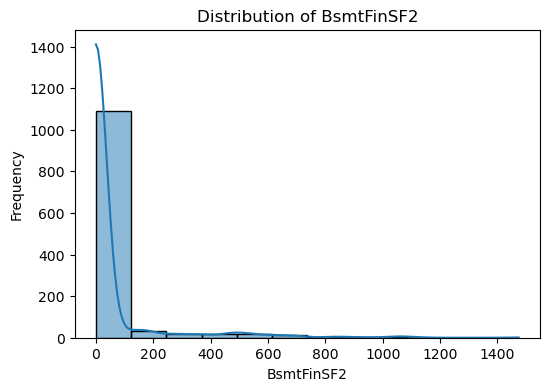

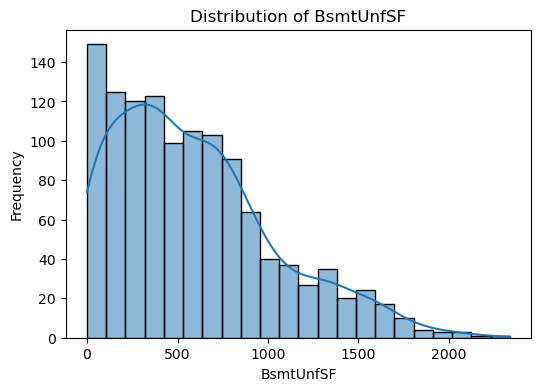

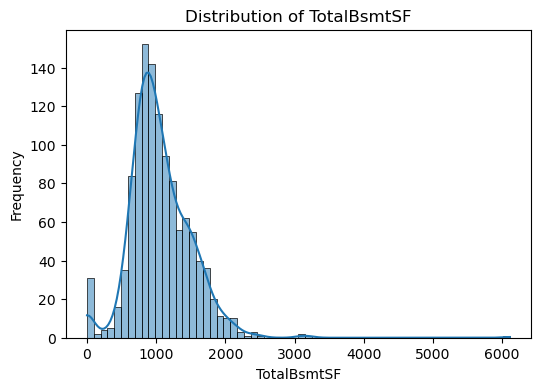

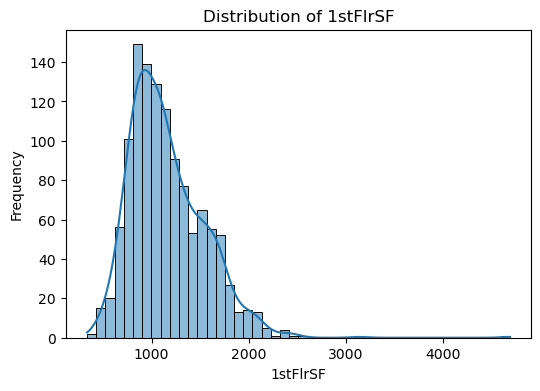

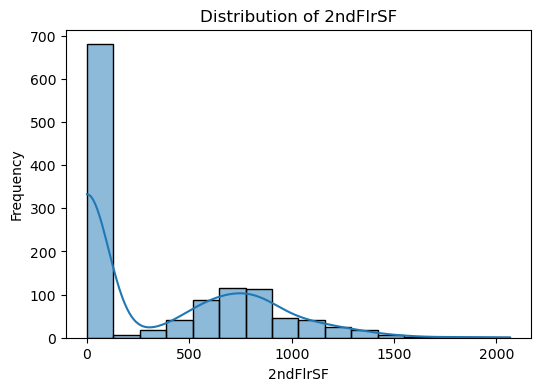

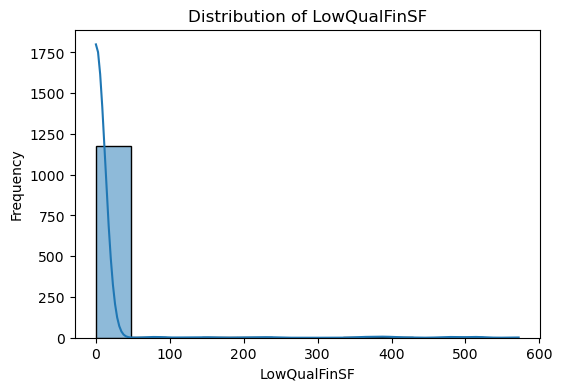

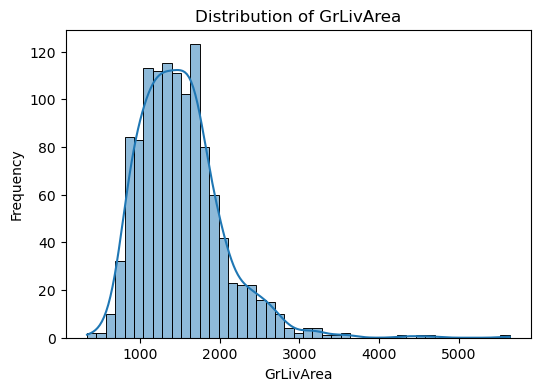

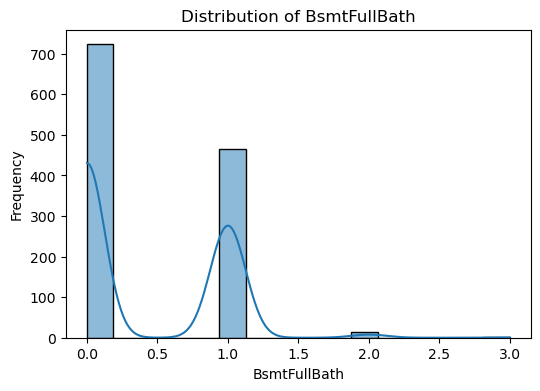

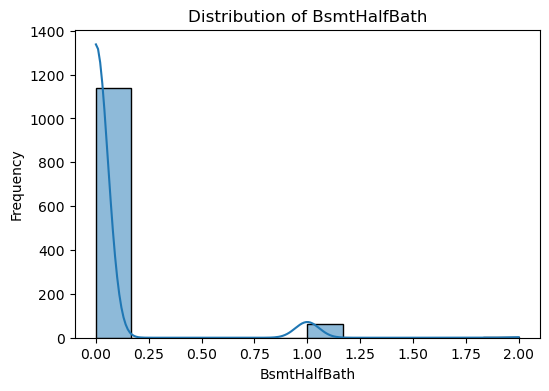

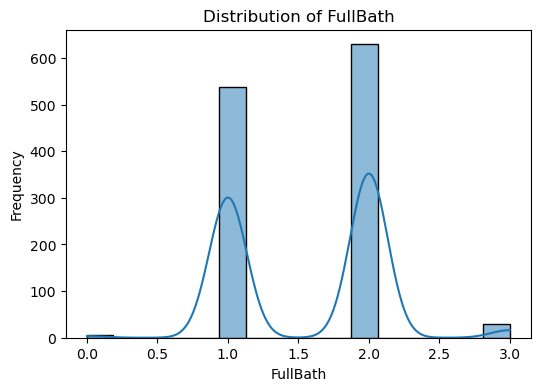

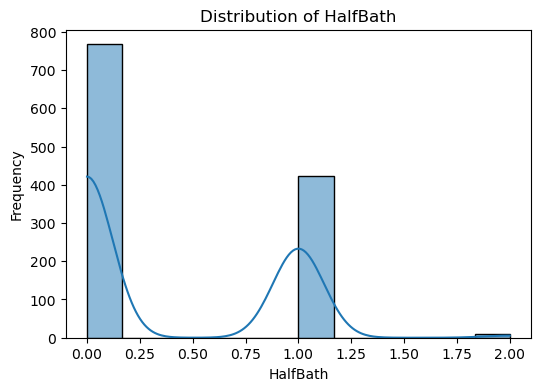

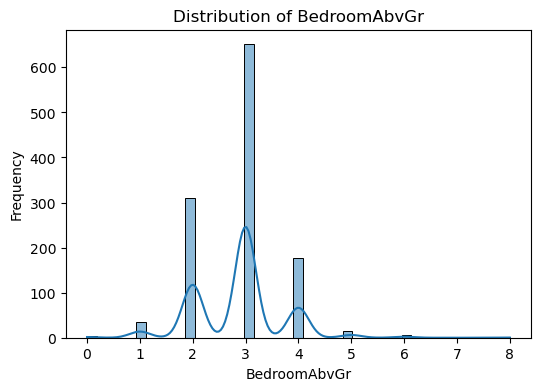

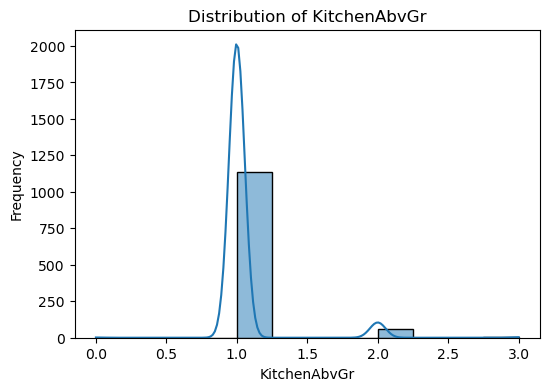

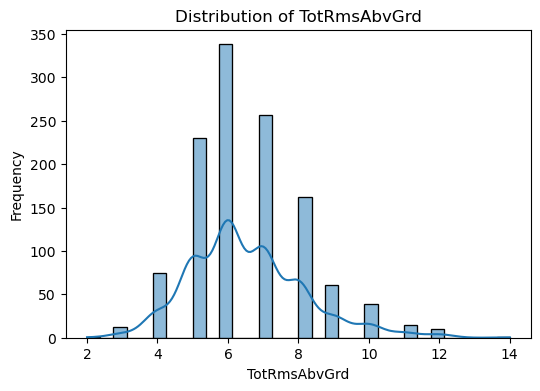

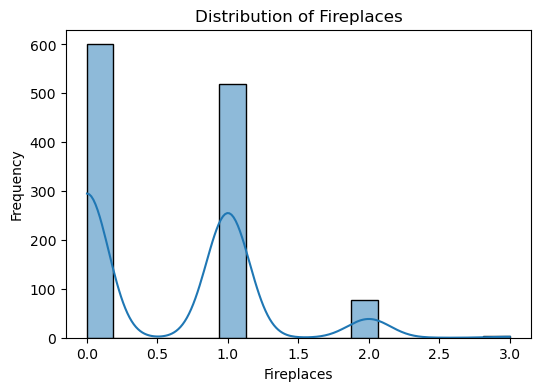

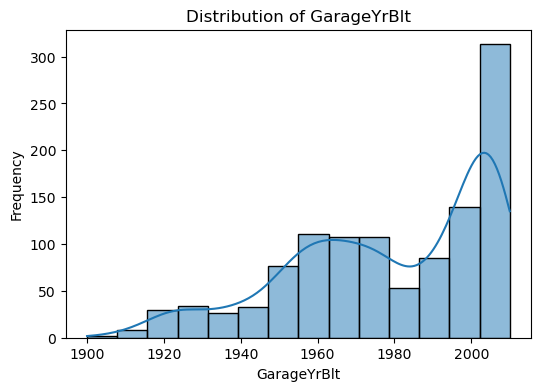

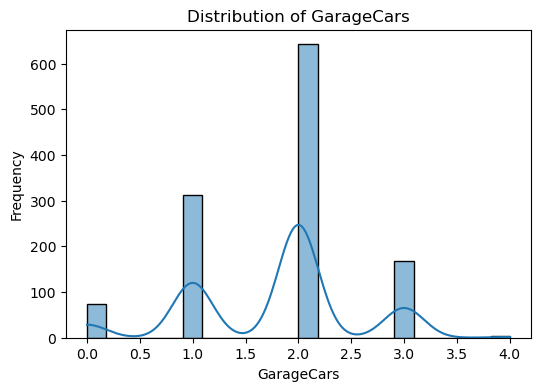

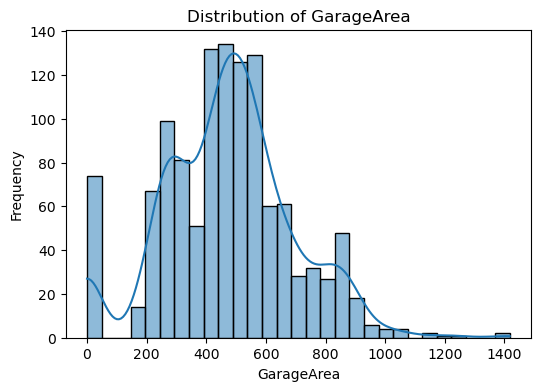

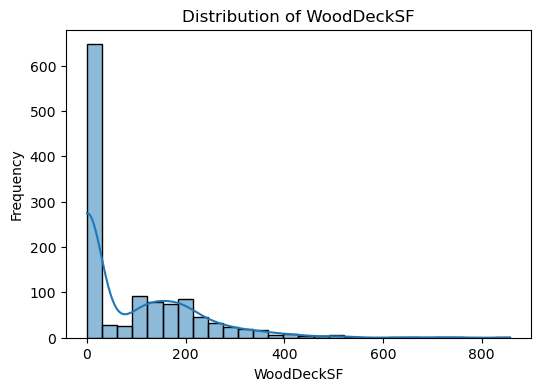

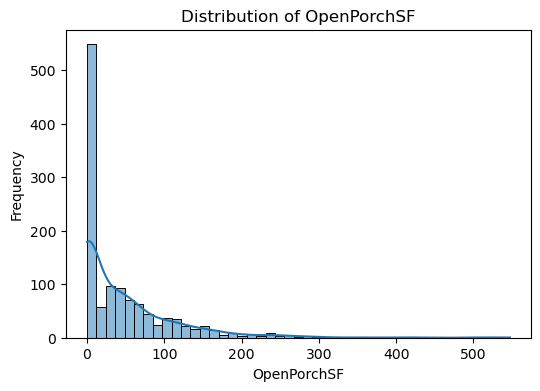

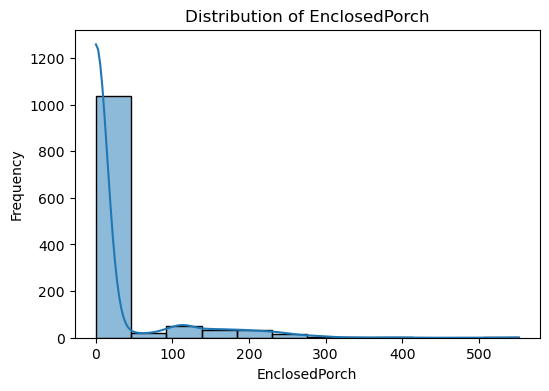

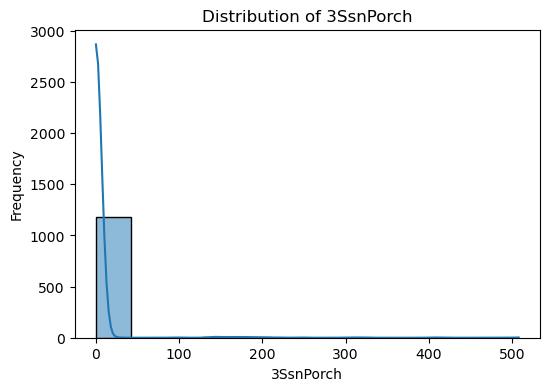

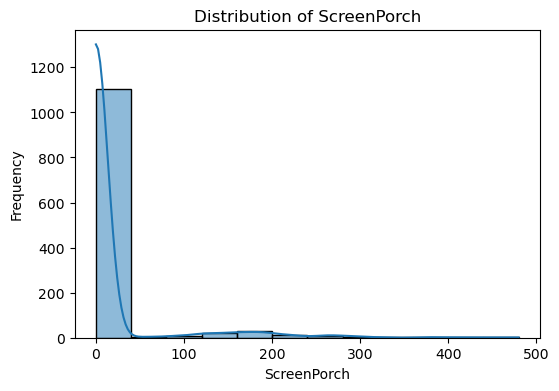

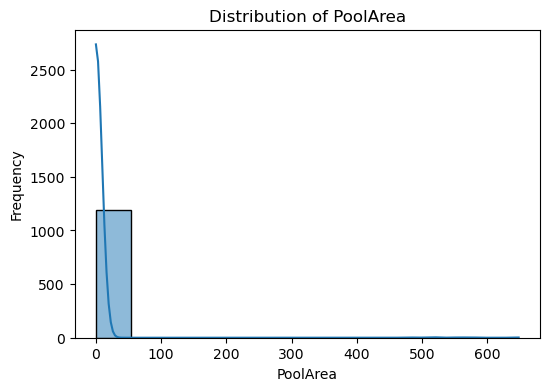

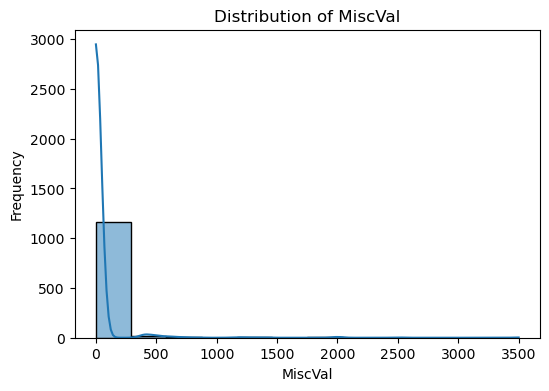

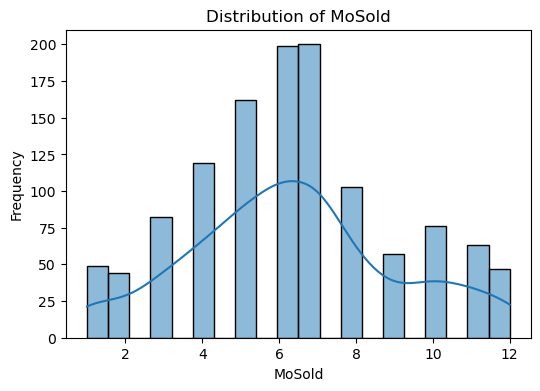

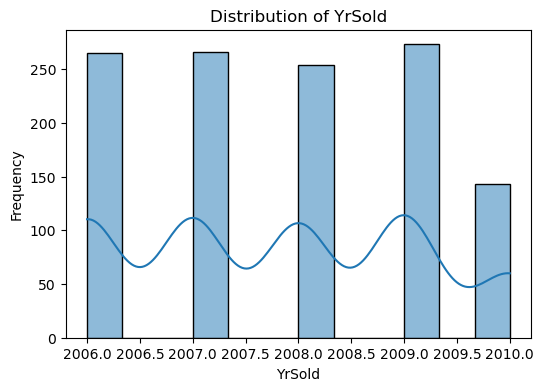

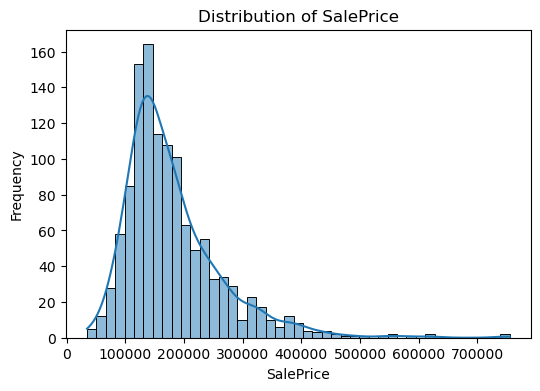

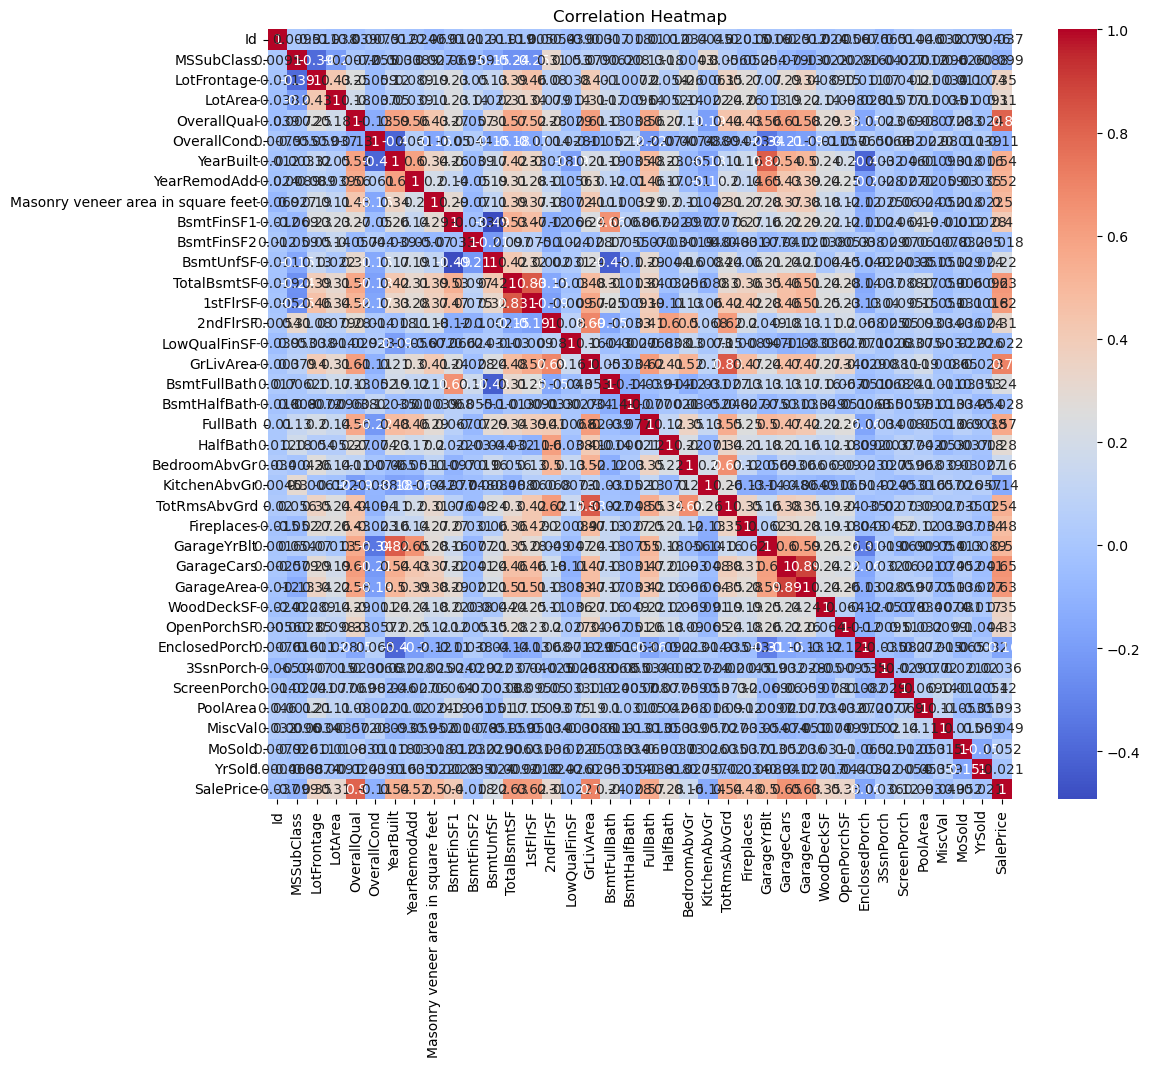

Correlation with SalePrice:
SalePrice                             1.000000
OverallQual                           0.802287
GrLivArea                             0.703557
GarageCars                            0.647302
GarageArea                            0.631761
TotalBsmtSF                           0.626977
1stFlrSF                              0.620159
FullBath                              0.566800
YearBuilt                             0.538913
TotRmsAbvGrd                          0.537215
YearRemodAdd                          0.519471
GarageYrBlt                           0.504690
Masonry veneer area in square feet    0.497168
Fireplaces                            0.479353
BsmtFinSF1                            0.403195
LotFrontage                           0.351799
WoodDeckSF                            0.345054
OpenPorchSF                           0.326530
LotArea                               0.311416
2ndFlrSF                              0.308957
HalfBath                        

In [71]:
# Selecting numerical columns for analysis
numerical_columns = Housing_Data_copy.select_dtypes(include=['int64', 'float64'])

# Descriptive Statistics
numerical_descriptive_stats = numerical_columns.describe()

# Correlation Matrix
correlation_matrix = numerical_columns.corr()

# Visualization - Histograms
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(Housing_Data_copy[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Visualization - Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation with the target variable (SalePrice)
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:")
print(correlation_with_target)


In [72]:
#Rename the data copy into new
Housing_Data_new = Housing_Data_copy

In [74]:
# check the head of new dataframe
Housing_Data_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
# check the shape of new dataframe
Housing_Data_new.shape

(1201, 79)

In [44]:
# check the column info of new dataframe
Housing_Data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  1201 non-null   int64  
 1   MSSubClass                          1201 non-null   int64  
 2   MSZoning                            1201 non-null   object 
 3   LotFrontage                         1201 non-null   float64
 4   LotArea                             1201 non-null   int64  
 5   Street                              1201 non-null   object 
 6   Alley                               86 non-null     object 
 7   LotShape                            1201 non-null   object 
 8   LandContour                         1201 non-null   object 
 9   Utilities                           1201 non-null   object 
 10  LotConfig                           1201 non-null   object 
 11  LandSlope                           1201 no

In [76]:
# splitting the dataframe into Train and Test
# Assuming 'housing_data' is your DataFrame
X = Housing_Data_new.drop('SalePrice', axis=1)  # Features
y = Housing_Data_new['SalePrice']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# check the shape of training datatset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (960, 78)
Shape of y_train: (960,)


In [78]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [79]:
# Verifying the head of the dataset before scaling
print(X_train.head())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1416  1417         190       RM         60.0    11340   Pave   NaN      Reg   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
500    501         160       RM         21.0     1890   Pave   NaN      Reg   
1133  1134          60       RL         80.0     9828   Pave   NaN      IR1   
640    641         120       RL         62.0    12677   Pave   NaN      IR1   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1416         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
898          Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
500          Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1133         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
640          Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

     MiscVal  MoSold  YrSold  SaleType

In [80]:
correlation_matrix = Housing_Data_new.corr()
# Get variables highly correlated with SalePrice
highly_correlated_vars = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5]
print(highly_correlated_vars)


OverallQual     0.802287
YearBuilt       0.538913
YearRemodAdd    0.519471
TotalBsmtSF     0.626977
1stFlrSF        0.620159
GrLivArea       0.703557
FullBath        0.566800
TotRmsAbvGrd    0.537215
GarageYrBlt     0.504690
GarageCars      0.647302
GarageArea      0.631761
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [81]:
print(Housing_Data_new.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Type of dwelling',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Masonry veneer type', 'Masonry veneer area in square feet',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 

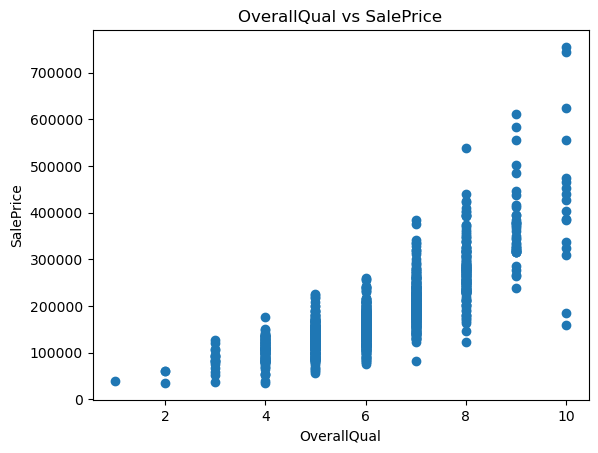

In [83]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.scatter(Housing_Data_new['OverallQual'], Housing_Data_new['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [85]:
# Check the column names in the DataFrame
column_names = Housing_Data_new.columns
print(column_names)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Type of dwelling',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Masonry veneer type', 'Masonry veneer area in square feet',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 

In [97]:
# Building the Linear Model
X = Housing_Data_new.drop('SalePrice', axis=1)  # Features
y = Housing_Data_new['SalePrice']  # Target variable

# Add a constant to the X (for statsmodels)
X = sm.add_constant(X)


In [99]:
print(Housing_Data_new.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object


In [106]:
# Assuming 'df' is your DataFrame
# Select only the object-type columns for conversion
object_columns = Housing_Data_new.select_dtypes(include=['object']).columns

# Convert object-type columns to numeric
for col in object_columns:
    Housing_Data_new[col] = pd.to_numeric(Housing_Data_new[col], errors='coerce')


In [107]:
print(Housing_Data_new.dtypes)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 229, dtype: object


In [111]:
# Fill missing values with mean (you can choose different strategies)
X_encoded = X_encoded.fillna(X_encoded.mean())

In [112]:
# Replace infinite values with a large finite number
X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan).fillna(1e12)  # Assuming 1e12 as a large finite number

In [113]:
model = sm.OLS(y.astype(float), X_encoded.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     56.02
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:30:05   Log-Likelihood:                -13704.
No. Observations:                1201   AIC:                         2.788e+04
Df Residuals:                     966   BIC:                         2.907e+04
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [116]:
# Initialize the model
model = LinearRegression()


In [120]:
categorical_columns = X.select_dtypes(include=['object']).columns


In [121]:
X_encoded = pd.get_dummies(X, columns=categorical_columns)


In [132]:
# Impute missing values with the mean (you can use other strategies as well)
X_encoded = X_encoded.fillna(X_encoded.mean())


In [133]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X_encoded)

In [136]:
# Initialize RFE with a model
rfe = RFE(model, n_features_to_select=15)

In [135]:
# Fit RFE to your training data
fit = rfe.fit(X_scaled, y)

In [145]:
# Get the indices of the selected features
selected_indices = np.where(fit.support_)[0]


In [147]:
# Filter indices within the range of the DataFrame columns
valid_indices = selected_indices[selected_indices < len(X.columns)]

In [148]:
# Get the corresponding column names from the DataFrame
selected_features = X.columns[valid_indices]


In [149]:
# Print the top 15 selected variables
top_15_list = selected_features[:15]  # Considering the top 15 features
print("Top 15 Selected Variables:", top_15_list)

Top 15 Selected Variables: Index([], dtype='object')


In [151]:
#Generic Function to Calculate VIF (Variance Inflation Factor)python
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [152]:
# Create a DataFrame with RFE selected variables
data_rfe = Housing_Data_new[top_15_list]

In [153]:
# Calculate VIF
vif_Housing_Data_new = calculate_vif(data_rfe)
print(Housing_Data_new)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  Masonry veneer area in square feet  BsmtFinSF1  \
0          2003          2003 

In [189]:
X_train_subset = X_train[top_15_list]

In [191]:
# Assuming X_train_subset and y_train are pandas DataFrames/Series
X_train_subset = X_train_subset.to_numpy()
y_train = y_train.to_numpy()

# Check their shapes
print("X_train_subset shape:", X_train_subset.shape)
print("y_train shape:", y_train.shape)

# Then fit the model
model.fit(X_train_subset, y_train)

X_train_subset shape: (960, 0)
y_train shape: (960,)


ValueError: Found array with 0 feature(s) (shape=(960, 0)) while a minimum of 1 is required.

In [195]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_encoded = X_train.copy()  # Create a copy of the data
X_train_encoded[cat_cols] = encoder.fit_transform(X_train[cat_cols])

NameError: name 'cat_cols' is not defined

In [193]:

lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

ValueError: could not convert string to float: 'RM'

In [156]:
# Define X and y again for Ridge and Lasso
X = Housing_Data_new.drop('SalePrice', axis=1)
y = Housing_Data_new['SalePrice']


In [158]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 228, dtype: int64


In [159]:
# Replace missing values or drop rows/columns with missing values
# For instance, to drop rows with any missing values:
X = X.dropna()


In [160]:
# Check for infinite values
print("Infinite Values:")
print(np.isinf(X).sum())

Infinite Values:
Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 228, dtype: int64


In [163]:
# Replace infinite values with NaN using .loc
X.loc[:, :] = X.replace([np.inf, -np.inf], np.nan)

/var/folders/_l/g5j2m5zn25d_yqgtv1vbf1rc0000gn/T/ipykernel_73868/4236677091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, :] = X.replace([np.inf, -np.inf], np.nan)


In [166]:
# Replace infinite and extremely large values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.where(np.abs(X) < np.finfo(np.float64).max)  # Replace extremely large values with NaN

In [168]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [171]:
y = y.reindex(X.index)

In [172]:
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
y = y[X.index]  # Perform the operation
y.index = X.index  # Set the index back to match X

In [173]:
# Assuming 'y' is a pandas Series
y = y[X.index]  # Align y with the rows in X after imputation

In [176]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))


In [178]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [179]:
# Remove rows with infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

In [180]:
from scipy import stats

z_scores = np.abs(stats.zscore(X))
threshold = 3
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[(z_scores < threshold).all(axis=1)]


In [184]:

# Assuming y is a pandas Series
# Drop rows with missing values from both X and y
combined = pd.concat([X, y], axis=1).dropna()

X = combined.iloc[:, :-1]  # Update X after dropping NaNs
y = combined.iloc[:, -1]  # Update y after dropping NaNs


In [185]:
y = y.loc[X.index]

In [187]:
# Lasso Regression
lasso = LassoCV(alphas=[0.1, 1.0, 10.0])
lasso.fit(X, y)
print("Optimal alpha for Lasso:", lasso.alpha_)

ValueError: at least one array or dtype is required